# Exercises 18

### Denoising 
Use contrast enhancement ways and Denoising methods to enhance the following noisy image to
the output image. Use both input images for denoising, and compare 'jpg' and 'png' formats!

In [1]:
# Import the necessary libraries
import cv2 # Computer vision library for image processing
import matplotlib.pyplot as plt # Data visualization library for creating graphs and plots
import numpy as np # Numerical computation library for mathematical operations
import random # Library for generating random numbers

In [2]:
def show_img_cv(img_title, img):
    """
    Displays the input image using OpenCV's imshow function. 

    Args:
        img_title (str): Title of the displayed image window.
        img (numpy.ndarray): The image data to be displayed.

    Returns:
        None
    """
    cv2.imshow(img_title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
def show_img_plt(img, c_map ='gray', fig_hight=8, fig_width=6, vmin=0, vmax=255):
    """
    Displays the input image using Matplotlib's imshow function. 

    Args:
        img (numpy.ndarray): The image data to be displayed.
        c_map (str): Colormap for the image. Default is 'gray'.
        fig_height (int): Height of the displayed figure in inches. Default is 8.
        fig_width (int): Width of the displayed figure in inches. Default is 6.
        vmin (float/int): Minimum value of the colormap range. Default is 0.
        vmax (float/int): Maximum value of the colormap range. Default is 255.

    Returns:
        None
    """
    plt.figure(figsize=(fig_hight, fig_width), dpi=100)
    plt.imshow(img, cmap=c_map, vmin=vmin, vmax=vmax)

In [4]:
def display_hist_plt(img, bins=256, range=(0, 256)):
    """
    Displays the histogram of input image using a Matplotlib histogram.

    Args:
        img (numpy.ndarray): The image data for which the histogram needs to be displayed.
        bins (int): Optional. Number of bins in the histogram. Default is 256.
        range (tuple): Optional. Range over which the histogram is computed. Default is (0, 256).

    Returns:
        None
    """
    plt.figure(figsize=(4, 2), dpi=100)
    plt.hist(img.flat, bins=bins, range=range)
    plt.show()

In [16]:
def show_mult_img(rows, columns, img_names, vmin=0, vmax=255):
    """
    Displays multiple images in a grid using Matplotlib subplots.

    Args:
        rows (int): Number of rows in the grid.
        columns (int): Number of columns in the grid.
        img_names (list): A list of image data to be displayed.
        vmin (float/int): Minimum value of the colormap range. Default is 0.
        vmax (float/int): Maximum value of the colormap range. Default is 255.

    Returns:
        None
    """
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

In [38]:
def denoising(image_color, kernel_size):
    red, green, blue = cv2.split(image_color)
    # denoising
    red_denoised = cv2.medianBlur(red, kernel_size)
    green_denoised = cv2.medianBlur(green, kernel_size)
    blue_denoised = cv2.medianBlur(blue, kernel_size)
    
    # contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=100)
    clahe_red = clahe.apply(red_denoised)
    clahe_green = clahe.apply(green_denoised)
    clahe_blue = clahe.apply(blue_denoised)

    
    # merging channels input is a tuple
    denoised = cv2.merge((clahe_red, clahe_green, clahe_blue))
    show_mult_img(1, 2, (image_color, denoised))
    

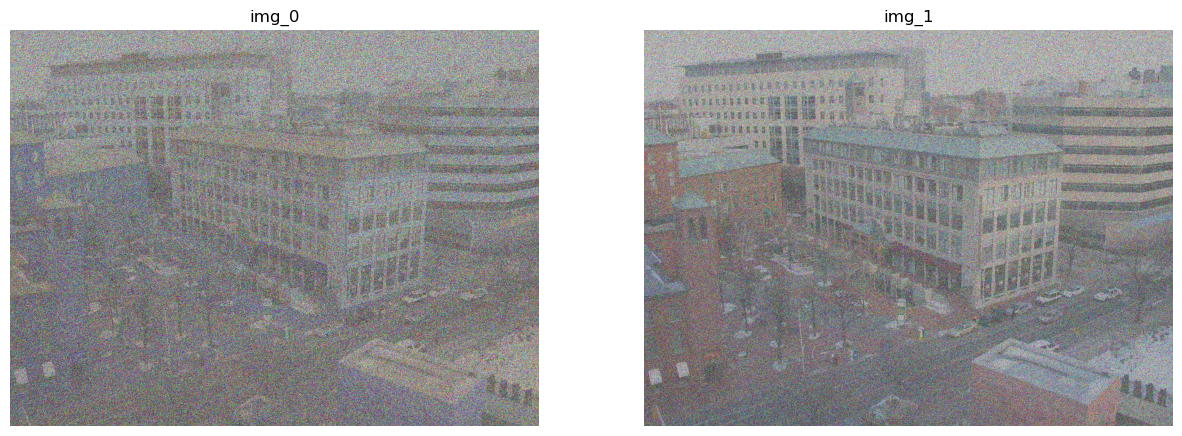

In [22]:
# Read the images
low_jpg = cv2.imread(r'img/input.jpg', -1)
low_png = cv2.imread(r'img/input.png', -1)


# Display the image using matplotlib
show_mult_img(1, 2, (low_jpg, low_png))

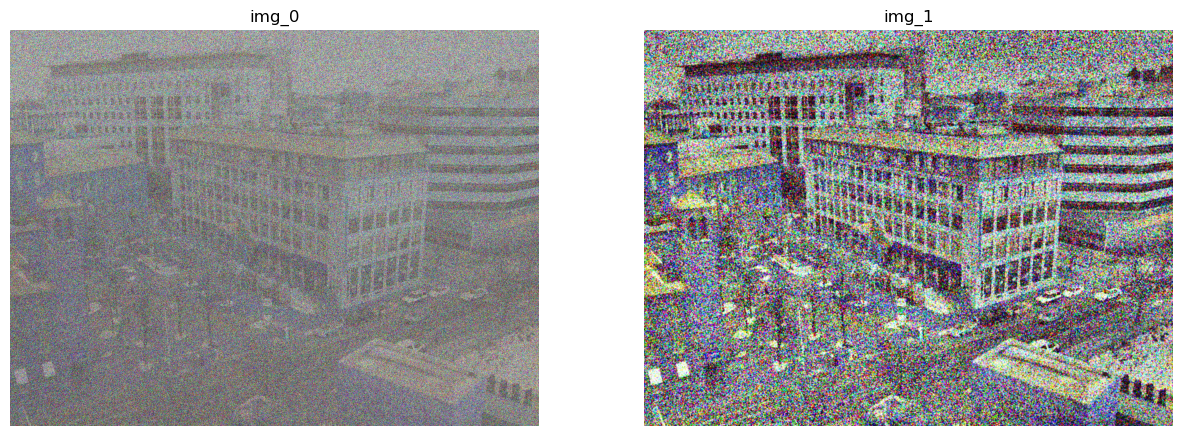

In [48]:
# denoising jpg image
denoising(low_jpg, 5)

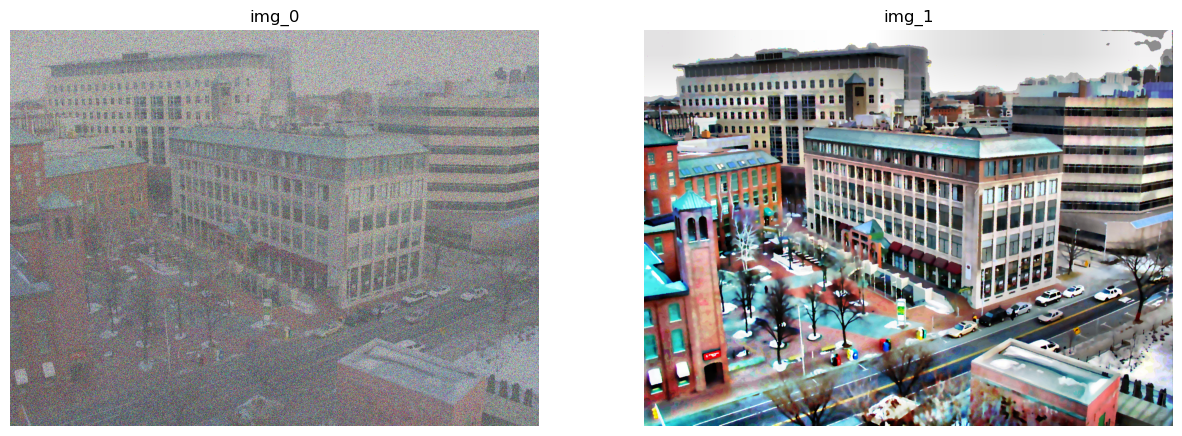

In [49]:
# denoising png image
denoising(low_png, 5)

# Result 
As you can see, denoising a JPG image is typically more challenging than denoising a PNG image.